In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [47]:
housing_df= pd.read_csv("housing.csv")
housing_df.head()
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [48]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [49]:
#ocean proximity is non numarical
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [50]:
housing_df.drop(housing_df[housing_df['ocean_proximity'] == "ISLAND"].index, inplace=True)

In [51]:
#ocean proximity is non numarical
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

In [52]:
housing_df.shape

(20635, 10)

In [53]:
# Count the number of null values for each feature
null_values_per_feature = housing_df.isnull().sum()

# Print the results
print("Count of null values for each feature:")
print(null_values_per_feature)

Count of null values for each feature:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [54]:
housing_df.dropna(subset=['total_bedrooms'], inplace = True)

In [55]:
# Count the number of null values for each feature
null_values_per_feature = housing_df.isnull().sum()

# Print the results
print("Count of null values for each feature:")
print(null_values_per_feature)

Count of null values for each feature:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [56]:
housing_df.shape

(20428, 10)

In [57]:
housing_df.duplicated().sum()

0

In [58]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000
mean,-119.570986,35.633778,28.629724,2636.764147,537.899305,1425.132220,499.488007,3.871437,206821.928432
std,2.003732,2.136312,12.590156,2185.451409,421.425970,1133.277418,382.326831,1.899432,115412.337452
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,788.000000,280.000000,2.563400,119475.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.537500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.250000,647.000000,1723.000000,604.000000,4.744075,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

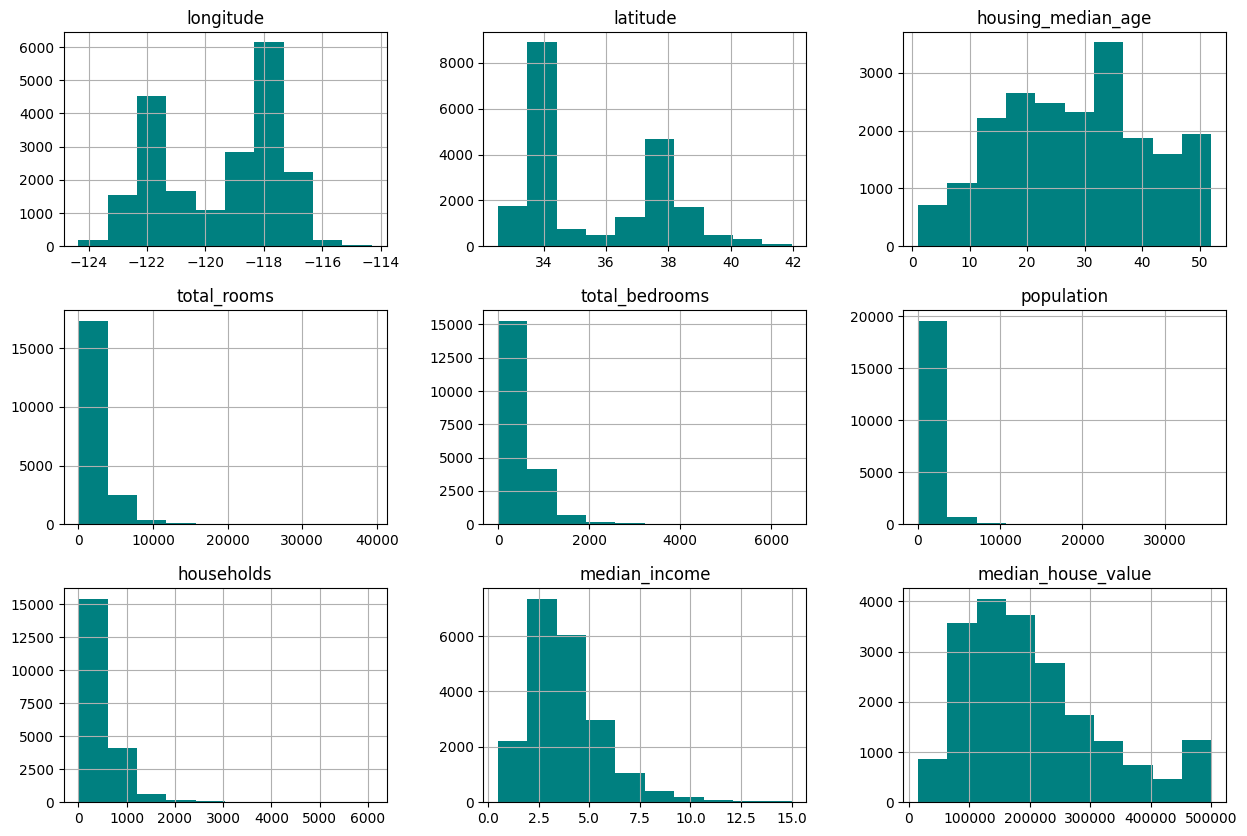

In [59]:
housing_df.hist(color = "teal",figsize=(15,10))

In [60]:
housing_df[housing_df['total_bedrooms']>1802.0].shape

(368, 10)

In [61]:
for feature_name in housing_df.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate highest and lowest allowed values for each feature
    upper_limit = housing_df[feature_name].mean() + 3 * housing_df[feature_name].std()
    lower_limit = housing_df[feature_name].mean() - 3 * housing_df[feature_name].std()

    # Apply the capping
    housing_df[feature_name] = np.where(
        housing_df[feature_name] > upper_limit,
        upper_limit,
        np.where(
            housing_df[feature_name] < lower_limit,
            lower_limit,
            housing_df[feature_name]
        )
    )

In [62]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000
mean,-119.570986,35.633778,28.629724,2560.533186,524.447387,1390.622183,487.642677,3.837006,206821.928432
std,2.003732,2.136312,12.590156,1744.270360,349.703186,921.884230,318.960013,1.758074,115412.337452
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,788.000000,280.000000,2.563400,119475.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.537500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.250000,647.000000,1723.000000,604.000000,4.744075,264700.000000
max,-114.310000,41.950000,52.000000,9193.118373,1802.177215,4824.964474,1646.468501,9.569732,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

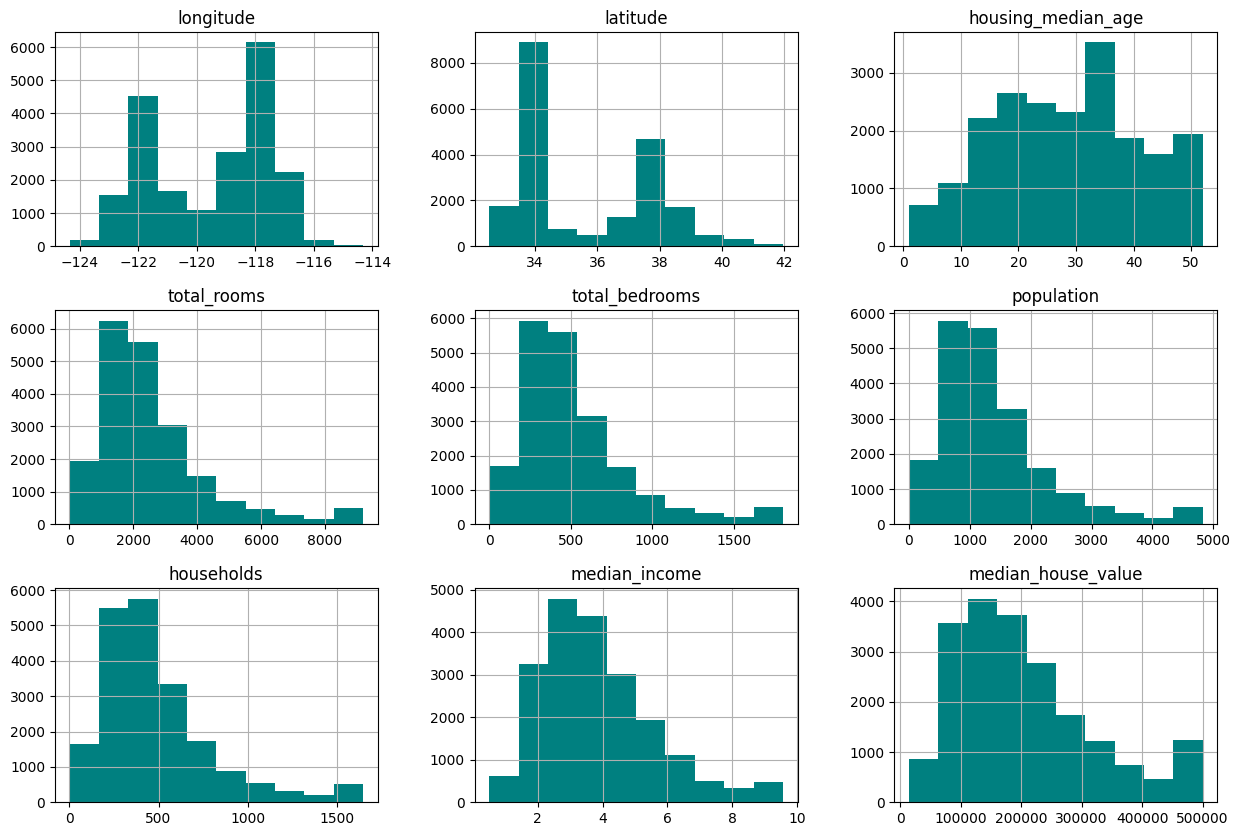

In [63]:
housing_df.hist(color = "teal",figsize=(15,10))

In [64]:
housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [65]:
housing_df['total_rooms']=np.sqrt(housing_df["total_rooms"])
housing_df['total_bedrooms']=np.sqrt(housing_df['total_bedrooms'])
housing_df["population"]=np.sqrt(housing_df['population'])
housing_df['households']=np.sqrt(housing_df["households"])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

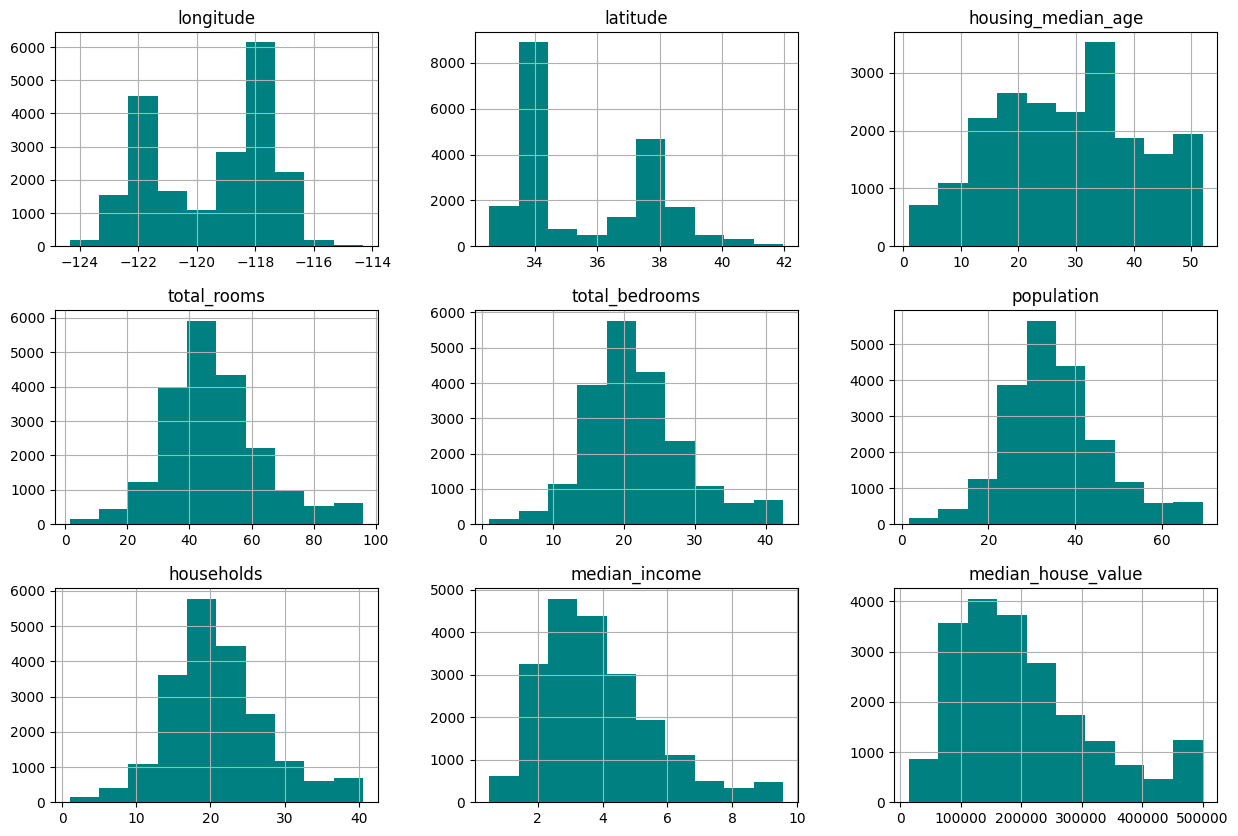

In [66]:
housing_df.hist(color = "teal",figsize=(15,10))

In [67]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,29.664794,11.357817,17.944358,11.224972,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,84.255564,33.256578,49.000000,33.734256,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,38.301436,13.784049,22.271057,13.304135,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,35.693137,15.329710,23.622024,14.798649,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,40.336088,16.733201,23.769729,16.093477,3.8462,342200.0,NEAR BAY


In [68]:
housing_df = pd.get_dummies(housing_df, columns=['ocean_proximity'], dtype=int)

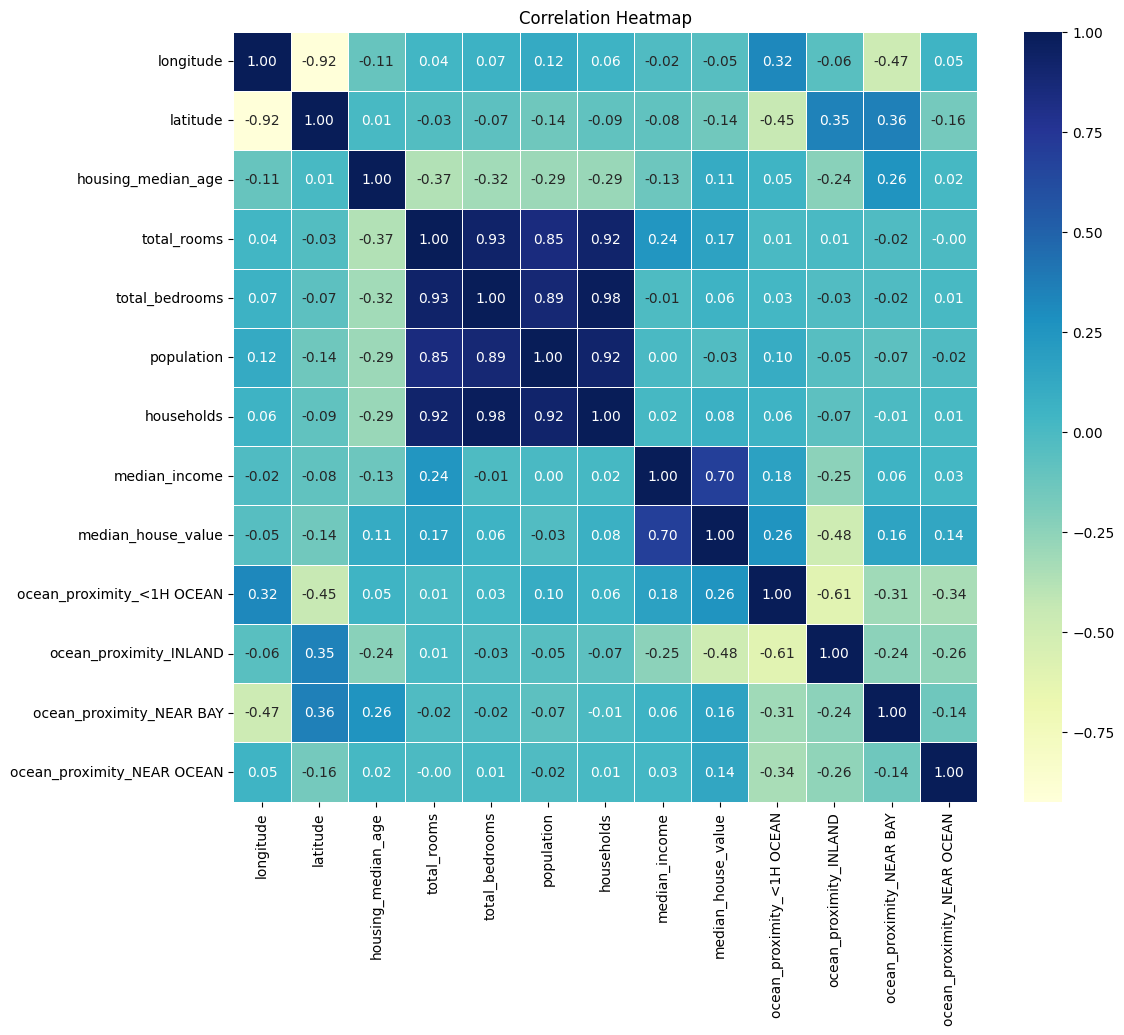

In [69]:
correlation_matrix = housing_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [70]:
housing_df['bedroom_ratio'] = housing_df['total_bedrooms'] / housing_df['total_rooms']
housing_df[ 'household_rooms'] = housing_df['total_rooms'] / housing_df['households']

In [71]:
housing_df.drop(columns=['total_bedrooms','total_rooms','households'],inplace = True)

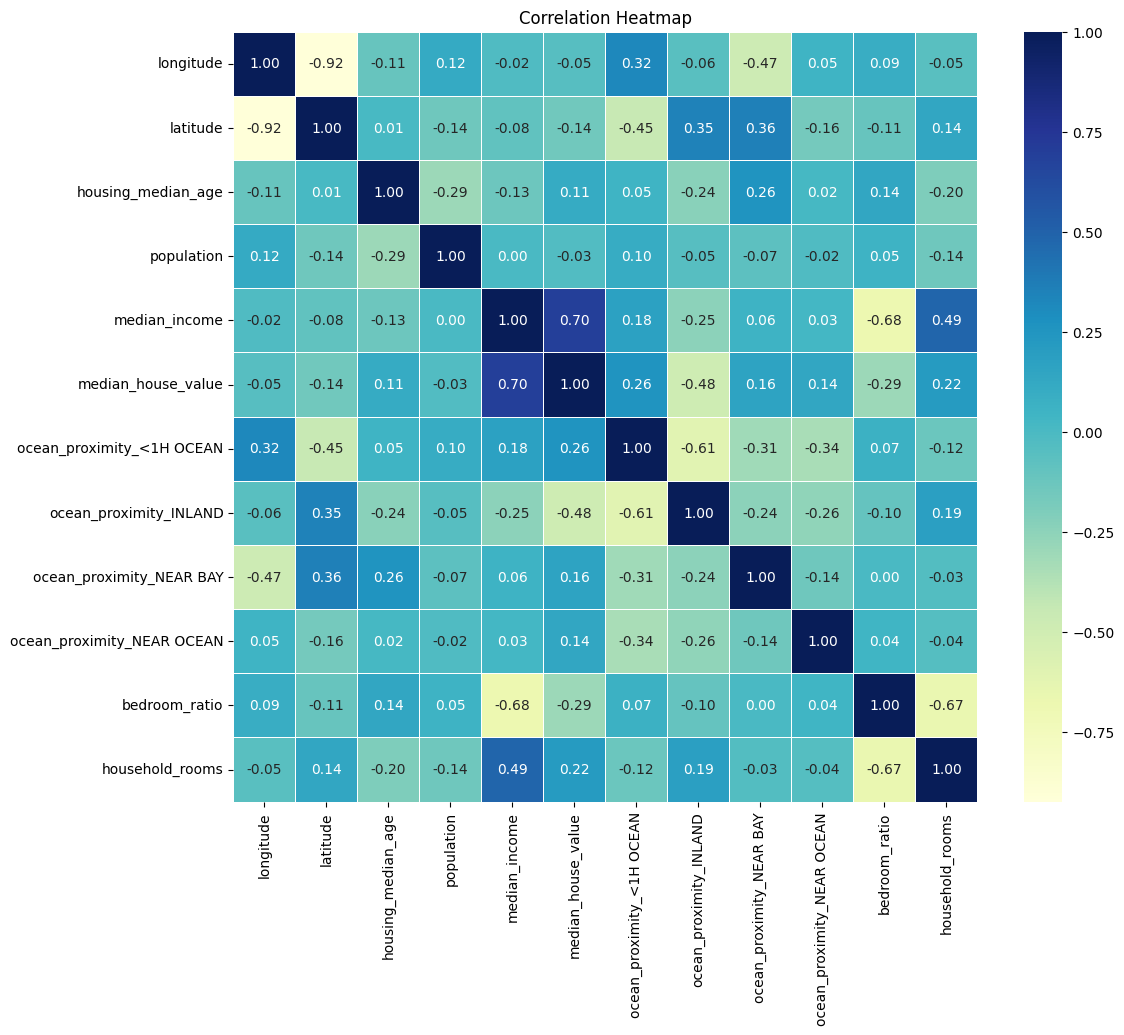

In [72]:
correlation_matrix = housing_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [73]:
X=housing_df.drop(['median_house_value'], axis='columns') #all coloumns except our target value
X.head()
y=housing_df['median_house_value'] #our target value

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform both the training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
!pip install lazypredict

In [77]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

 76%|███████▌  | 32/42 [03:12<00:21,  2.12s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [03:36<00:00,  5.15s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 16342, number of used features: 11
[LightGBM] [Info] Start training from score 206981.598213


In [78]:
print(predictions)

                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
XGBRegressor                                 0.83       0.83   46984.78   
LGBMRegressor                                0.83       0.83   47907.41   
HistGradientBoostingRegressor                0.82       0.82   48372.98   
RandomForestRegressor                        0.82       0.82   48648.28   
BaggingRegressor                             0.81       0.81   50718.93   
ExtraTreesRegressor                          0.79       0.79   53149.42   
GradientBoostingRegressor                    0.75       0.75   57432.38   
DecisionTreeRegressor                        0.66       0.66   67058.69   
KNeighborsRegressor                          0.66       0.66   67235.29   
LassoCV                                      0.63       0.64   69490.08   
BayesianRidge                                0.63       0.64   69490.70   
Ridge                    

Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

forest = RandomForestRegressor(n_estimators = 10)
forest.fit(X_train, y_train)

# Predictions on the tarin set
y_train_pred = forest.predict(X_train)
# Predictions on the test set
y_pred = forest.predict(X_test)

# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_pred)

# Print the metrics
print("Training Set Metrics:")
print("  MAE:", mae_train)
print("  MSE:", mse_train)
print("  RMSE:", rmse_train)
print("  MAPE:", mape_train)
print("  R2 Score:", r2_train)

print("\nTest Set Metrics:")
print("  MAE:", mae_test)
print("  MSE:", mse_test)
print("  RMSE:", rmse_test)
print("  MAPE:", mape_test)
print("  R2 Score:", r2_test)

Training Set Metrics:
  MAE: 13559.19134132909
  MSE: 490002764.1838141
  RMSE: 22136.00605763863
  MAPE: 7.532702744913543
  R2 Score: 0.9632524551419064

Test Set Metrics:
  MAE: 33921.563485070976
  MSE: 2670995222.320391
  RMSE: 51681.67201552588
  MAPE: 18.76143188048256
  R2 Score: 0.7985534725974767


In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

forest = RandomForestRegressor(n_estimators = 300,min_samples_split = 10, max_depth = 40)
forest.fit(X_train, y_train)

# Predictions on the tarin set
y_train_pred = forest.predict(X_train)
# Predictions on the test set
y_pred = forest.predict(X_test)

# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_pred)

# Print the metrics
print("Training Set Metrics:")
print("  MAE:", mae_train)
print("  MSE:", mse_train)
print("  RMSE:", rmse_train)
print("  MAPE:", mape_train)
print("  R2 Score:", r2_train)

print("\nTest Set Metrics:")
print("  MAE:", mae_test)
print("  MSE:", mse_test)
print("  RMSE:", rmse_test)
print("  MAPE:", mape_test)
print("  R2 Score:", r2_test)

Training Set Metrics:
  MAE: 18156.852599003894
  MSE: 788417981.5451974
  RMSE: 28078.78169624169
  MAPE: 10.068412031884618
  R2 Score: 0.9408729352945213

Test Set Metrics:
  MAE: 31945.760401084062
  MSE: 2411429634.893708
  RMSE: 49106.30952223663
  MAPE: 17.704448073365253
  R2 Score: 0.8181299157836522


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

forest = RandomForestRegressor(n_estimators = 350,min_samples_split = 3, max_depth = 40)
forest.fit(X_train, y_train)

# Predictions on the tarin set
y_train_pred = forest.predict(X_train)
# Predictions on the test set
y_pred = forest.predict(X_test)

# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_pred)

# Print the metrics
print("Training Set Metrics:")
print("  MAE:", mae_train)
print("  MSE:", mse_train)
print("  RMSE:", rmse_train)
print("  MAPE:", mape_train)
print("  R2 Score:", r2_train)

print("\nTest Set Metrics:")
print("  MAE:", mae_test)
print("  MSE:", mse_test)
print("  RMSE:", rmse_test)
print("  MAPE:", mape_test)
print("  R2 Score:", r2_test)

Training Set Metrics:
  MAE: 12248.649611188383
  MSE: 367935959.09210736
  RMSE: 19181.656839076946
  MAPE: 6.865775091885093
  R2 Score: 0.9724068022674033

Test Set Metrics:
  MAE: 31518.16409545196
  MSE: 2356995891.3940716
  RMSE: 48548.90206167459
  MAPE: 17.45803027397443
  R2 Score: 0.8222353100988077


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

forest = RandomForestRegressor(n_estimators = 100,min_samples_split = 20)
forest.fit(X_train, y_train)

# Predictions on the tarin set
y_train_pred = forest.predict(X_train)
# Predictions on the test set
y_pred = forest.predict(X_test)

# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_pred)

# Print the metrics
print("Training Set Metrics:")
print("  MAE:", mae_train)
print("  MSE:", mse_train)
print("  RMSE:", rmse_train)
print("  MAPE:", mape_train)
print("  R2 Score:", r2_train)

print("\nTest Set Metrics:")
print("  MAE:", mae_test)
print("  MSE:", mse_test)
print("  RMSE:", rmse_test)
print("  MAPE:", mape_test)
print("  R2 Score:", r2_test)

Training Set Metrics:
  MAE: 23298.77431354739
  MSE: 1244681929.554696
  RMSE: 35280.05002199821
  MAPE: 12.877313279190913
  R2 Score: 0.9066556183278759

Test Set Metrics:
  MAE: 32775.66484327053
  MSE: 2508895241.0110893
  RMSE: 50088.87342525373
  MAPE: 18.16534590208214
  R2 Score: 0.8107790572985997


SVM

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
svm_model = SVR(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 11427352891.00
Root Mean Squared Error (RMSE): 106898.79742540981
Mean Absolute Percentage Error (MAPE): 44.75%


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model = SVR()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_
best_score = -grid_search.best_score_
print(f"Best Cross-Validated Negative MSE Score: {best_score:.2f}")
y_pred = best_svm_model.predict(X_test_scaled)

Best Cross-Validated Negative MSE Score: 6875518383.67
Mean Absolute Percentage Error (MAPE) on Test Set: 28.24%


In [91]:
# Calculate metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_pred)

# Print the metrics
print("Training Set Metrics:")
print("  MAE:", mae_train)
print("  MSE:", mse_train)
print("  RMSE:", rmse_train)
print("  MAPE:", mape_train)
print("  R2 Score:", r2_train)

print("\nTest Set Metrics:")
print("  MAE:", mae_test)
print("  MSE:", mse_test)
print("  RMSE:", rmse_test)
print("  MAPE:", mape_test)
print("  R2 Score:", r2_test)

Training Set Metrics:
  MAE: 23298.77431354739
  MSE: 1244681929.554696
  RMSE: 35280.05002199821
  MAPE: 12.877313279190913
  R2 Score: 0.9066556183278759

Test Set Metrics:
  MAE: 55440.80205012487
  MSE: 6504416241.21426
  RMSE: 80649.96119784721
  MAPE: 28.244544922330462
  R2 Score: 0.5094367621388378


Linear Regression

In [85]:
#Applying linear regression model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_scaled,y_train)
#stabilize variance of the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

#train model
model = LinearRegression()
model.fit(X_train_scaled, y_train_log)

#predict
y_pred_log = model.predict(X_test_scaled)

# Transform predictions back to the original scale, inverse log transformation is necessary
# for the predictions to be interpretable and comparable to the original target variable
y_pred_log_back = np.expm1(y_pred_log)

#Evaluate the model
#mean absolute percentage error
mape_test = np.mean(np.abs((y_test - y_pred_log_back) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%')
print(f'Accuracy: {100-mape_test:.2f}%')
# RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_log_back))
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')
#mean absolute error
mae_test = np.mean(np.abs(np.expm1(y_test_log) - np.expm1(y_pred_log)))
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
# R-squared (R2)
r2_test = r2_score(y_test, y_pred_log_back)
print(f'R-squared (R2): {r2_test:.2f}')

Mean Absolute Percentage Error (MAPE): 26.11%
Accuracy: 73.89%
Root Mean Squared Error (RMSE): 74391.95
Mean Absolute Error (MAE): 50746.53
R-squared (R2): 0.58


Decision Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Stabilize variance of the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Train model
#samples leaf: control depth of tree
dt_model = DecisionTreeRegressor(random_state=41, min_samples_leaf=11)
dt_model.fit(X_train_scaled, y_train_log)

# Predict
y_pred_log = dt_model.predict(X_test_scaled)

# Transform predictions back to the original scale
y_pred_log_back = np.expm1(y_pred_log)

# Evaluate the model on the test set
# Mean Absolute Percentage Error (MAPE)
mape_test = np.mean(np.abs((y_test - y_pred_log_back) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%')
print(f'Accuracy: {100 - mape_test:.2f}%')
# Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_log_back))
print(f'Root Mean Squared Error (RMSE): {rmse_test:.2f}')
# Mean Absolute Error (MAE)
mae_test = np.mean(np.abs(np.expm1(y_test_log) - np.expm1(y_pred_log)))
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
# R2 Score
r2_test = r2_score(y_test, y_pred_log_back)
print(f'R-squared (R2): {r2_test:.2f}')

Mean Absolute Percentage Error (MAPE): 19.77%
Accuracy: 80.23%
Root Mean Squared Error (RMSE): 56629.51
Mean Absolute Error (MAE): 37079.97
R-squared (R2): 0.76


XGBoost

In [92]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_train_scaled and y_train are your training data
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.3
    # 'colsample_bytree': 0.8,
    # 'subsample': 0.8
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=10)

# Make predictions on the training set
y_train_pred = model.predict(dtrain)


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = calculate_mape(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {mse_train}')
print(f'Training Root Mean Squared Error (RMSE): {rmse_train}')
print(f'Training Mean Absolute Percentage Error (MAPE): {mape_train}%')
print(f'Training R-squared (R²): {r2_train}')

# Make predictions on the test set
y_test_pred = model.predict(dtest)

# Calculate metrics for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = calculate_mape(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error: {mse_test}')
print(f'Test Root Mean Squared Error (RMSE): {rmse_test}')
print(f'Test Mean Absolute Percentage Error (MAPE): {mape_test}%')
print(f'Test R-squared (R²): {r2_test}')

Training Mean Squared Error: 2766737828.4375744
Training Root Mean Squared Error (RMSE): 52599.78924328095
Training Mean Absolute Percentage Error (MAPE): 21.28086137745184%
Training R-squared (R²): 0.7925096960821332
Test Mean Squared Error: 3248351852.640667
Test Root Mean Squared Error (RMSE): 56994.31421326751
Test Mean Absolute Percentage Error (MAPE): 22.05024029444218%
Test R-squared (R²): 0.7550092208972425


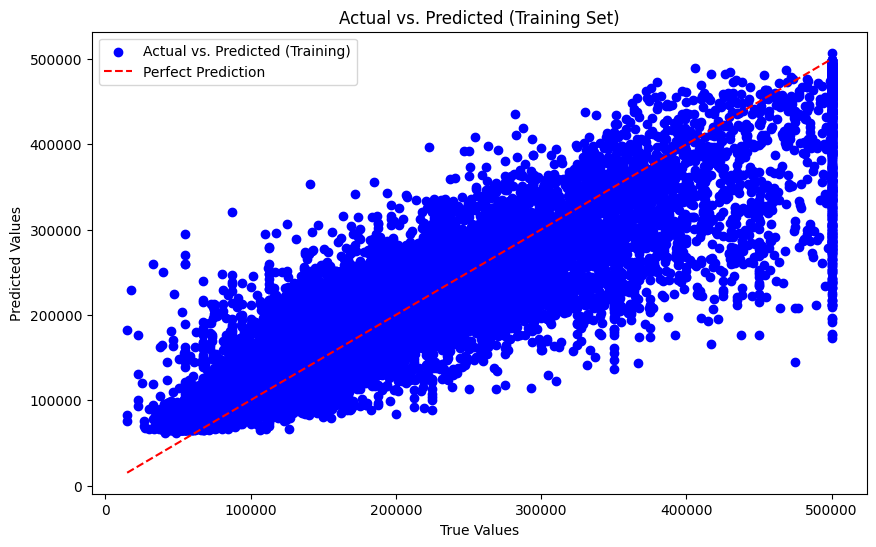

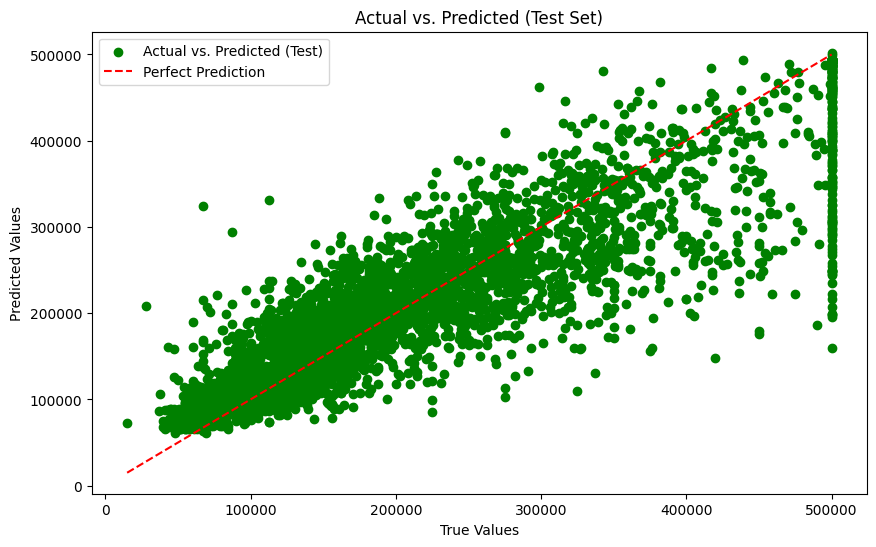

In [93]:
import matplotlib.pyplot as plt

# Plot for Training Set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted (Training Set)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot for Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs. Predicted (Test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted (Test Set)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
